[(b'', 0, 0, 0., 0.) (b'', 0, 0, 0., 0.) (b'', 0, 0, 0., 0.)]
[ 0.2465 -0.814   0.0862 -0.7867 -2.0717 -0.2086  1.6982 -0.536  -1.4446
 -1.2735]
[[-0.814   1.5964]
 [ 1.6982  1.095 ]
 [-1.2735  1.1086]]
\Users\Justi\Documentstable.h5 (File) np.str_('')
Last modif.: '2025-06-03T19:50:29+00:00'
Object Tree: 
/ (RootGroup) np.str_('')
/integers (Array(50000, 2)) np.str_('')
/ints_float (Table(np.int64(50000),)) np.str_('Ints and floats')

/ear (EArray(np.int64(375000), np.int64(500))) ''
CPU times: user 4.68 s, sys: 3.95 s, total: 8.63 s
Wall time: 3.01 s
[-0.94773484 -0.34159436  0.67551209  0.81430357  3.73712444]


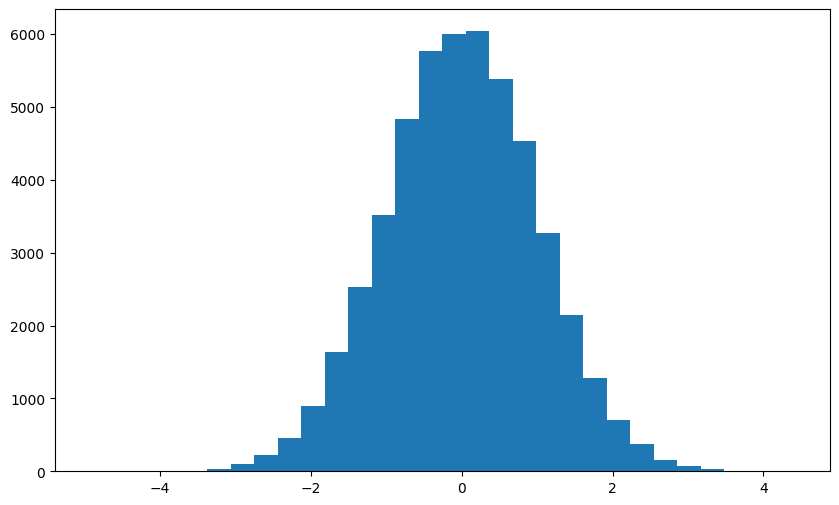

In [ ]:
import sqlite3 as sq3
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tables as tb
rows = 50000
path = "\\Users\\Justi\\Documents"

filename = path + "table.h5"
h5.close()
h5 = tb.open_file(filename, "w")
# random numbers from 0-10000 - 500000 rows and 2 columns 
ran_int = np.random.randint(0, 10000, size=(rows,2))
#random numbers standardly distrubtued with the same shape as the ndarray above
ran_flo = np.random.standard_normal((rows, 2)).round(4)
#special dtype
dty = np.dtype([("Date", "S26"), ("No1", "<i4"), ("No2", "<i4"), ("No3", "<f8"), ("No4", "<f8")])
# creates an array with the same length as the ndarray
sarray = np.zeros(len(ran_int), dtype=dty)
print(sarray[:3])
sarray["Date"] = dt.datetime.now()
sarray["No1"] = ran_int[:,0]
sarray["No2"] = ran_int[:, 1]
sarray["No3"] = ran_flo[:, 0]
sarray["No4"] = ran_flo[:, 1]
filters = tb.Filters(complevel=0)
tab = h5.create_table("/",
 "ints_float",
  sarray, title="Ints and floats",
   filters=filters)

print(tab[:10]["No3"])
plt.figure(figsize = (10,6))
plt.hist(tab[:]["No3"], bins = 30)

filename = path + "comp.h5"
h5c.close()
h5c = tb.open_file(filename, "w")

filter = tb.Filters(complevel = 5, complib="blosc")

tabc = h5c.create_table("/", "ints_floats", sarray,
 title="ints and floats", expectedrows=rows, filters=filters)

query = '((No3 < -0.5) | (No3 > 0.5)) & ((No4 < -1) | (No4 > 1))'

iteratorc = tab.where(query)
#each of the values are stored in an array from the filtered rows 
res = [(row["No3"], row["No4"]) for row in iteratorc]
res = np.array(res)
print(res[:3])

arr_int = h5.create_array("/", "integers", ran_int)
print(h5)
h5.close()

filename = path + "earray.h5"

h5 = tb.open_file(filename, "w")

n = 500

ear = h5.create_earray("/", "ear", atom=tb.Float64Atom(), shape=(0,n))

rand = np.random.standard_normal((n,n))

for _ in range(750):
    ear.append(rand)
ear.flush()

print(ear)

out = h5.create_earray("/", "out", atom=tb.Float64Atom(), shape=(0,n))

expr = tb.Expr("3 * sin(ear) + sqrt(abs(ear))")

expr.set_output(out, append_mode=True)

%time expr.eval()

print(out[0, :5])


